In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
Data= pd.read_csv(r"C:\Users\user\Desktop\NLP_project\Restaurant_Reviews.tsv",sep='\t')

In [15]:
Data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


1= pos
0= neg

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
from nltk.corpus import opinion_lexicon

In [ ]:
# Bing Liu Opinion Lexicon
negative_lexicon = opinion_lexicon.negative()

# negative_lexicon
negative_words = set()
for review in Data['Review']:
    words = review.split()
    for word in words:
        if word.lower() in negative_lexicon:
            negative_words.add(word.lower())

print("Negative words found in the reviews:")
print(", ".join(negative_words))

Exploring Data

In [19]:
Data['Liked'].value_counts() 

1    500
0    500
Name: Liked, dtype: int64

In [20]:
Data['Review'].apply(len).max()

149

**Visualizing Data**

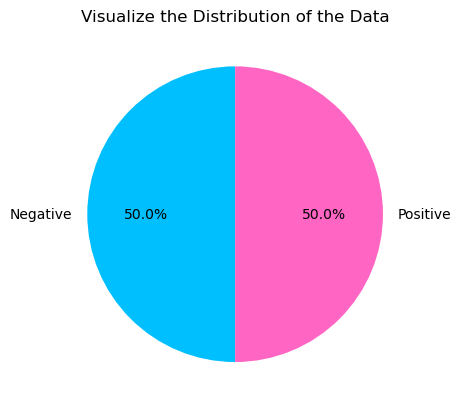

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for the pie chart
colors = ['#00BFFF', '#FF66C4']  # Blue and Pink

# Create a pie chart of the "Liked" column
plt.pie(Data['Liked'].value_counts(), labels=['Negative', 'Positive'], colors=colors, autopct='%1.1f%%', startangle=90)

# Set the title of the plot
plt.title('Visualize the Distribution of the Data')

# Show the plot
plt.show()


*Visualizing Negative and Positive Words*

In [22]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
# Loading the negative word list
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
neg_words = set()
for word, score in sia.lexicon.items():
    if score < 0:
        neg_words.add(word)
        
# Extracting negative words
negative_words = []
for review in Data['Review']:
    words = review.lower().split()
    for i, word in enumerate(words):
        if word in neg_words:
            if i > 0 and words[i-1] == 'not':
                negative_words.append('not ' + word)
            else:
                negative_words.append(word)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Loading the positive word list
pos_words = set()
for word, score in sia.lexicon.items():
    if score > 0:
        pos_words.add(word)

# Extracting positive words
positive_words = []
for review in Data['Review']:
    words = review.lower().split()
    for i, word in enumerate(words):
        if word in pos_words:
            positive_words.append(word)

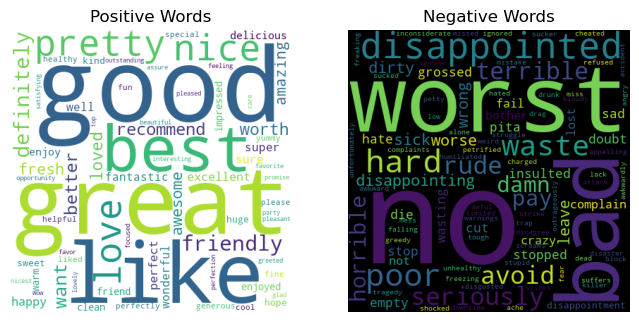

In [25]:
# Generate WordClouds for positive and negative words
wordcloud_pos = WordCloud(width=400, height=400, background_color='white', stopwords=set(), min_font_size=8)
wordcloud_neg = WordCloud(width=400, height=400, background_color='black', stopwords=set(), min_font_size=8)

wordcloud_pos.generate_from_text(" ".join(positive_words))
wordcloud_neg.generate_from_text(" ".join(negative_words))

# Plot WordClouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), facecolor=None)
ax1.imshow(wordcloud_pos)
ax1.axis("off")
ax1.set_title("Positive Words")

ax2.imshow(wordcloud_neg)
ax2.axis("off")
ax2.set_title("Negative Words")

plt.show()

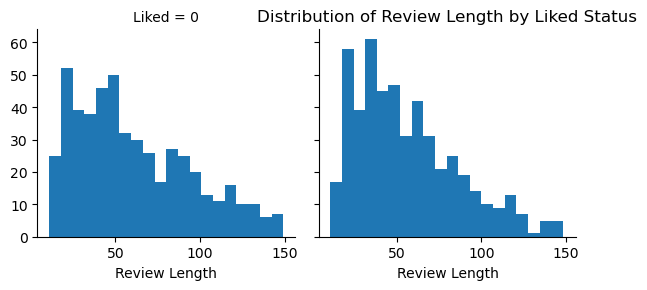

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column to store the length of each review
Data['Review Length'] = Data['Review'].apply(len)

# Create a FacetGrid object to separate the data based on the 'Liked' column
g = sns.FacetGrid(Data, col='Liked')

# Use the FacetGrid object to plot a histogram of the 'Review Length' column for each value of 'Liked'
g.map(plt.hist, 'Review Length', bins=20)

# Set the title of the plot
plt.title('Distribution of Review Length by Liked Status')

# Show the plot
plt.show()

In [27]:
# Calculate the average length of positive reviews
avg_length_positive = Data.loc[Data['Liked'] == 1, 'Review Length'].mean()
print('Average length of positive reviews:', avg_length_positive)

# Calculate the average length of negative reviews
avg_length_negative = Data.loc[Data['Liked'] == 0, 'Review Length'].mean()
print('Average length of negative reviews:', avg_length_negative)

Average length of positive reviews: 55.88
Average length of negative reviews: 60.75


pre-processing Data NLTK 

In [28]:
Data['Review'][0]

'Wow... Loved this place.'

In [29]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
from nltk.corpus import stopwords

In [31]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
s = Data['Review'][0]
s

'Wow... Loved this place.'

In [34]:
#Regular expressions
import re
s = re.sub('[^a-zA-Z0-9]',' ', s) #We delete everything other than numbers and letters
s

'Wow    Loved this place '

In [35]:
s = s.lower()
s

'wow    loved this place '

In [36]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [37]:
temp = []

for word in s :
    if word not in stopwords.words('english'):
        temp.append(word)
temp
#delete stopwords

['wow', 'loved', 'place']

In [38]:
#list
 
[word for word in s if word not in  stopwords.words('english') ]

['wow', 'loved', 'place']

In [39]:
s= ' '.join(temp)
s

'wow loved place'

In [40]:
#Stemmers
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
porter.stem(s)


'wow loved plac'

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer()

In [43]:
vectorizer.fit_transform(s.split()).toarray()


array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [44]:
#putting it all together

corpus= []
for i in range(len(Data)):
    s=re.sub('[^a-zA-Z0-9]',' ', Data['Review'][i])
    s=s.lower()
    s=s.split()
    s=[word for word in s if word not in  stopwords.words('english') ]
    s=' '.join(s)
    s=porter.stem(s)
    corpus.append(s)
corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food 4 tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer 2

In [45]:
vectorizer = CountVectorizer()

In [46]:
vectorizer.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
x= vectorizer.fit_transform(corpus).toarray()


In [48]:
y = Data['Liked']

In [49]:
# Model Traning , building 

In [50]:

from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [52]:
from sklearn.naive_bayes import MultinomialNB

# Build a MultinomialNB Classifier
model = MultinomialNB()

# Model training
model.fit(x_train, y_train)



MultinomialNB()

In [53]:
model.fit(x_train , y_train)

MultinomialNB()

In [54]:
x_train.shape

(670, 2013)

In [55]:
x_test.shape

(330, 2013)

In [56]:
#Model prediction

In [57]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [58]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [59]:
#Model Evaluation

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [61]:
print(confusion_matrix(y_test, y_pred))

[[116  57]
 [ 31 126]]


In [62]:
print(accuracy_score(y_test, y_pred))

0.7333333333333333


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       173
           1       0.69      0.80      0.74       157

    accuracy                           0.73       330
   macro avg       0.74      0.74      0.73       330
weighted avg       0.74      0.73      0.73       330



**Creating the Bag of Words model**

In [64]:
# upload the data
Data= pd.read_csv(r'C:\Users\user\Desktop\NLP_project\Restaurant_Reviews.tsv',sep='\t', quoting=3)

In [65]:
# Review Data
Data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [66]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #used fr stemming the word
corpus = []
for i in range(0, Data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', Data['Review'][i])  
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1600)
X = cv.fit_transform(corpus).toarray()
y = Data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[92  5]
 [36 67]]
0.795


In [69]:
print(accuracy_score(y_test, y_pred))

0.795


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        97
           1       0.93      0.65      0.77       103

    accuracy                           0.80       200
   macro avg       0.82      0.80      0.79       200
weighted avg       0.83      0.80      0.79       200



In [71]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk

# Load the data and create Bag of Words model
Data= pd.read_csv(r'C:\Users\user\Desktop\NLP_project\Restaurant_Reviews.tsv',sep='\t', quoting=3)
corpus = Data['Review'].values.astype('U')
cv = CountVectorizer(max_features=1600)
X = cv.fit_transform(corpus).toarray()
y = Data.iloc[:, -1].values

In [72]:
# Train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy')
classifier.fit(X, y)

# Define the GUI
def analyze_phrase():
    # Get the input phrase from the user
    phrase = entry.get()
    
    # Analyze the phrase using the trained model
    phrase_transformed = cv.transform([phrase]).toarray()
    prediction = classifier.predict(phrase_transformed)[0]
    
    # Display the result
    if prediction == 0:
        result_label.config(text="The phrase is negative.")
    else:
        result_label.config(text="The phrase is positive.")

# Create the GUI window
window = tk.Tk()
window.title("Sentiment Analysis")

# Create the input field and button
entry = tk.Entry(window, width=100)
entry.pack(pady=10)
analyze_button = tk.Button(window, text="Analyze", command=analyze_phrase)
analyze_button.pack()

# Create the label to display the result
result_label = tk.Label(window, text="")
result_label.pack(pady=10)

# Start the GUI event loop
window.mainloop()